점진적 학습: 이전에 훈련한 모델을 버리지 않고, 새로운 데이터에 대해서만 조금씩 더 훈련하자.\
확률적 경사 하강법(Stochastic Gradient Descent): 대표적인 점진적 학습 알고리즘 중 하나

로지스틱 손실함수 (=이진 크로스 엔트로피 손실 함수) \
양성클래스의 예측을 타깃값과 곱함. 음성클래스는 1에서 예측을 빼고 양성타깃과 곱함.\
$L: -(y * log(a)  + (1-y)*(log (1-a)))$

In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [10]:
from sklearn.linear_model import SGDClassifier

# SGD는 내부적으로 확률적 경사하강법 사용 (미니배치X)
sc = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42) # logistic
sc.fit(X_train_scaled, y_train)
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.8403361344537815
0.8


In [11]:
# 이어서 1에포크씩 재훈련
sc.partial_fit(X_train_scaled, y_train)
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.907563025210084
0.925


조기종료: 과대적합이 시작되기 전에 훈련을 멈추는 것

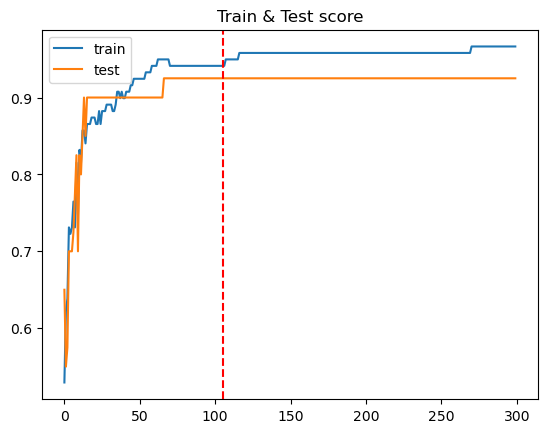

In [18]:
import numpy as np
import matplotlib.pyplot as plt

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score: list = []
test_score: list = []
classes = np.unique(y_train)

for _ in range(0, 300):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)
    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))
    
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.axvline(x=105, color='r', linestyle='--')
plt.title('Train & Test score')
plt.legend()
plt.show()

대략 105번째 반복 이후로는 train/test의 점수 차이가 벌어지기 시작

In [20]:
sc = SGDClassifier(loss='log_loss', max_iter=105, tol=None, random_state=42)
sc.fit(X_train_scaled, y_train)
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.957983193277311
0.925


힌지 손실 함수: SGDClassifier의 기본값. 이것이 SVM, Support Vector Machine

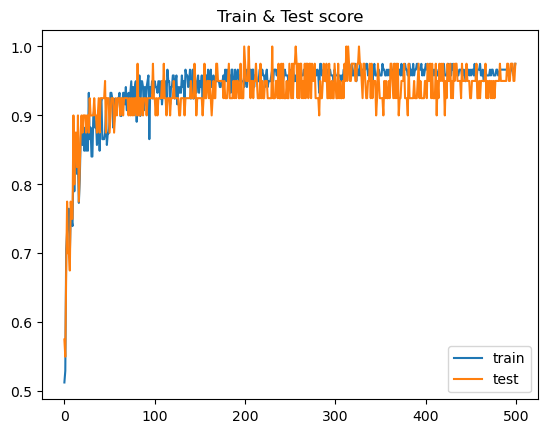

In [31]:
import numpy as np
import matplotlib.pyplot as plt

sc = SGDClassifier(loss='hinge', random_state=42)
train_score: list = []
test_score: list = []
classes = np.unique(y_train)

for _ in range(0, 500):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)
    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))
    
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.title('Train & Test score')
plt.legend()
plt.show()

In [30]:
sc = SGDClassifier(loss='hinge', max_iter=465, tol=None, random_state=42)
sc.fit(X_train_scaled, y_train)
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.957983193277311
0.95
